## Лабораторная работа 1.

### (Квази) линейные методы классификации


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, datasets
import seaborn as sns
from scipy.stats import norm

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA
from sklearn. model_selection import train_test_split
from sklearn. model_selection import RepeatedStratifiedKFold
from sklearn. model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

Загрузить таблицу Iris из репозитория UCI

In [2]:
iris = datasets.load_iris() #датасет

Поместить данные в объект DataFrame библиотеки pandas.


In [3]:
df = pd.DataFrame(iris.data,columns = iris['feature_names'])
df.head() #таблица

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df = pd.DataFrame(iris.data,columns = iris.feature_names)
df['target'] = iris['target']
df['name'] = df['target'].map(lambda x : iris['target_names'][x]) 


Вычислить корреляции между признаками на всей таблице и отдельно по классам (использовать pd.groupby).


In [5]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [6]:
correlations = df.corr()
correlations.head()

C:\Users\79132\AppData\Local\Temp\ipykernel_20948\2883819253.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [8]:
class_correlations = df.groupby("target").corr()
class_correlations

C:\Users\79132\AppData\Local\Temp\ipykernel_20948\3837332843.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.corr is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  class_correlations = df.groupby("target").corr()


sepal length (cm)  sepal width (cm)  \
target                                                          
0      sepal length (cm)           1.000000          0.742547   
       sepal width (cm)            0.742547          1.000000   
       petal length (cm)           0.267176          0.177700   
       petal width (cm)            0.278098          0.232752   
1      sepal length (cm)           1.000000          0.525911   
       sepal width (cm)            0.525911          1.000000   
       petal length (cm)           0.754049          0.560522   
       petal width (cm)            0.546461          0.663999   
2      sepal length (cm)           1.000000          0.457228   
       sepal width (cm)            0.457228          1.000000   
       petal length (cm)           0.864225          0.401045   
       petal width (cm)            0.281108          0.537728   

                          petal length (cm)  petal width (cm)  
target                                                         
0      sepal length (cm)           0.267176          0.278098  
       sepal width (cm)            0.177700          0.232752  
       petal length (cm)           1.000000          0.331630  
       petal width (cm)            0.331630          1.000000  
1      sepal length (cm)           0.754049          0.546461  
       sepal width (cm)            0.560522          0.663999  
       petal length (cm)           1.000000          0.786668  
       petal width (cm)            0.786668          1.000000  
2      sepal length (cm)           0.864225          0.281108  
       sepal width (cm)            0.401045          0.537728  
       petal length (cm)           1.000000          0.322108  
       petal width (cm)            0.322108          1.000000

Визуализировать распределения классов на всех парах переменных.

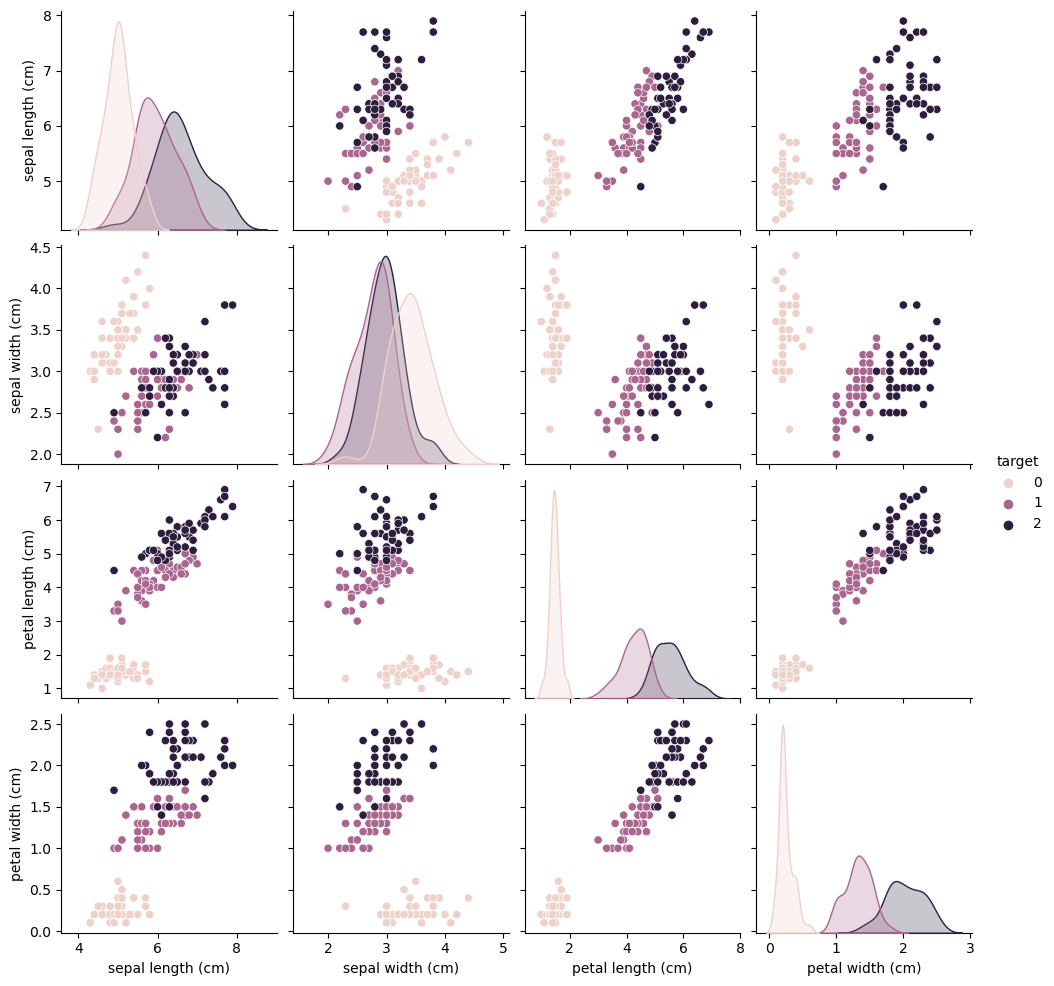

In [10]:
sns.pairplot(df, hue="target")

 Выбрать две переменные. Построить и визуализировать (показать разделяющую кривую) решения методами линейный и квадратичный дискриминант, логистическая регрессия, SVM (линейное и квадратичное ядро).

In [12]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


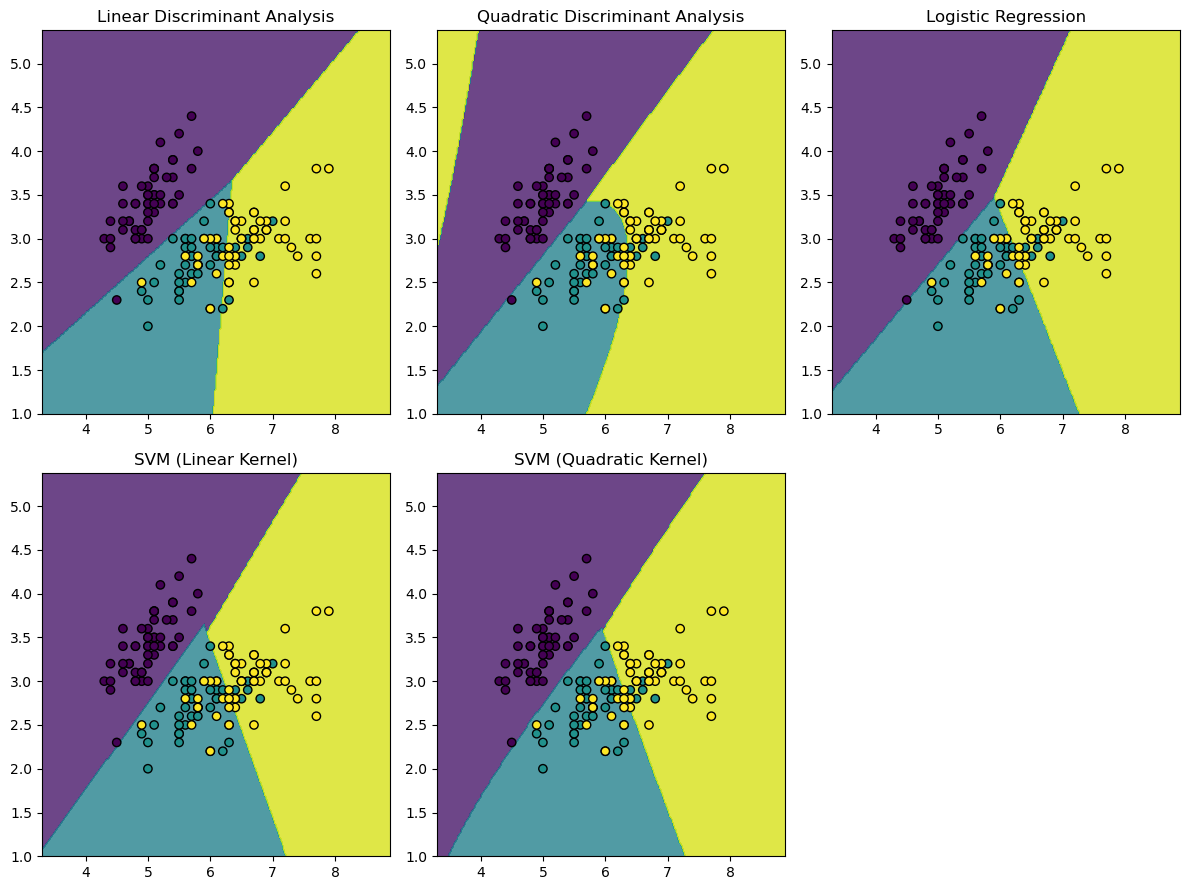

In [13]:
X = iris.data[:, :2]  # Выбор двух переменных
y = iris.target

# Создание сетки для построения разделяющих кривых
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Модели классификации
classifiers = [
    ("Linear Discriminant Analysis", LDA()),
    ("Quadratic Discriminant Analysis", QDA()),
    ("Logistic Regression", LogisticRegression()),
    ("SVM (Linear Kernel)", SVC(kernel="linear")),
    ("SVM (Quadratic Kernel)", SVC(kernel="poly", degree=2))
]

# Построение и визуализация разделяющих кривых
plt.figure(figsize=(12, 9))
for i, (name, classifier) in enumerate(classifiers):
    classifier.fit(X, y)
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.subplot(2, 3, i + 1)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(name)

plt.tight_layout()
plt.show()

В следующих заданиях можно оставить только два (наименее разделимых) класса.

In [14]:
df = df[:][50:150]

In [15]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


Построить линейный дискриминант на всех переменных. Визуализировать ответы алгоритма (выделить, например, цветом) и классы объектов (выделить, например, формой маркеров) во всех двумерных подпространствах.

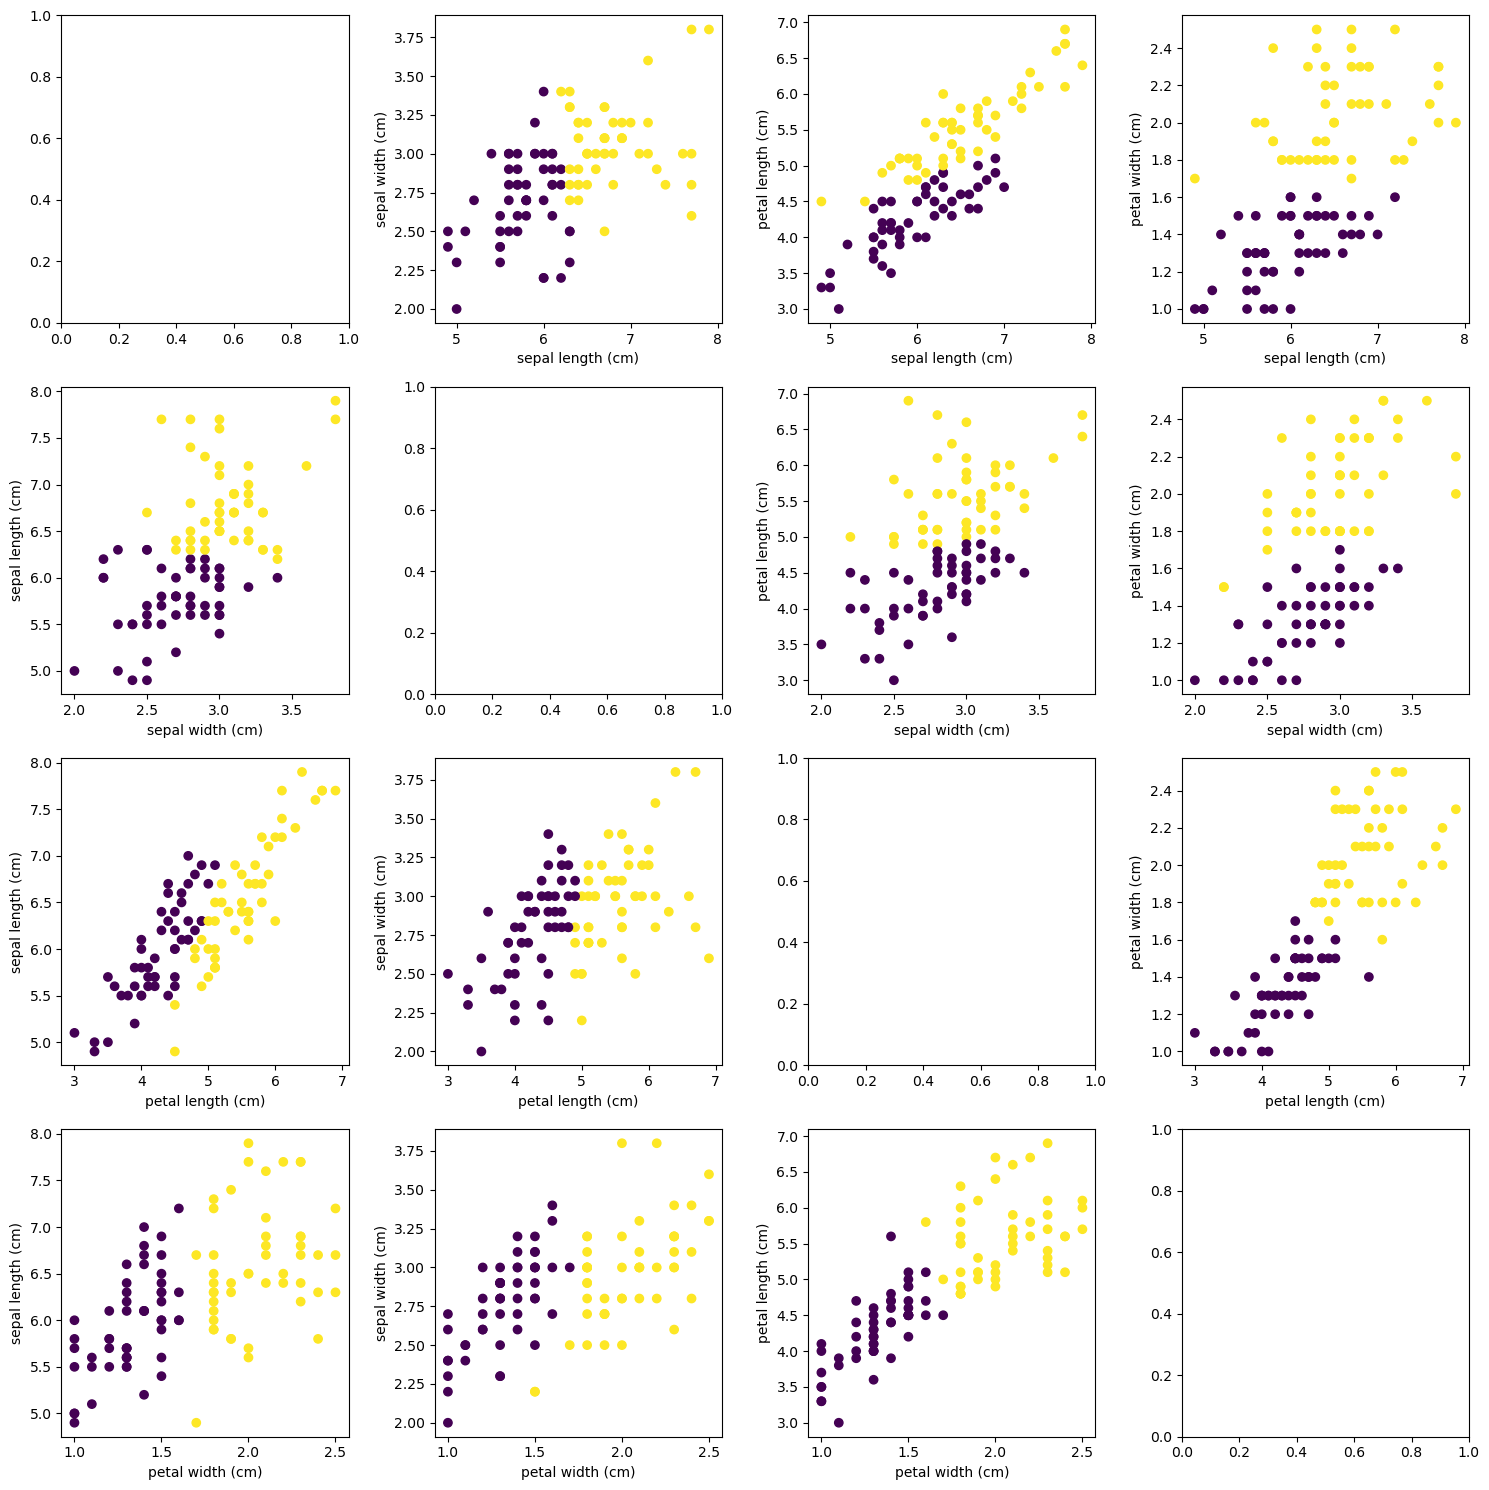

In [16]:
X = df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
X = X.to_numpy()
y = df['target']
y=y.to_numpy()

lda = LDA()

fig, axs = plt.subplots(4, 4, figsize=(15, 15))


for i in range(4): #перебор всех пар 
    for j in range(4):
        if i != j:
            X_subset = X[:, [i, j]]
            lda.fit(X_subset, y)
            y_pred = lda.predict(X_subset)
            axs[i, j].scatter(X_subset[:, 0], X_subset[:, 1], c=y_pred)
            axs[i, j].set_xlabel(iris.feature_names[i])
            axs[i, j].set_ylabel(iris.feature_names[j])

plt.tight_layout()
plt.show()

 На двух переменных из п2 вычислить квадратичную разделяющую функцию непосредственно по оценкам ковариационных матриц и средних (самостоятельно реализовать метод, не используя готовый). Визуализировать её и сравнить с решением из п2.


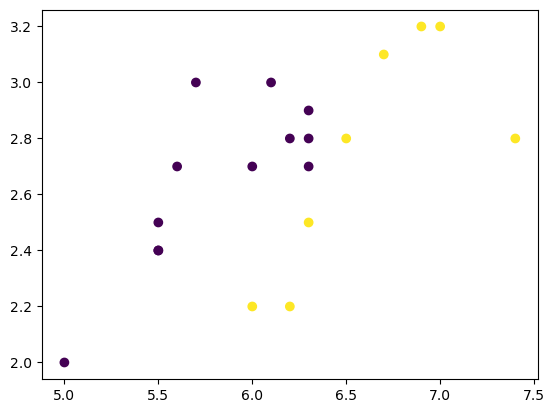

In [17]:
def qda(X_train, y_train, X_test):
    clas = np.unique(y_train)
    X_train_clas = [X_train[y_train == c] for c in clas]
    means = [np.mean(X, axis=0) for X in X_train_clas]
    covs = [np.cov(X.T) for X in X_train_clas]
    prob = [len(X) / len(X_train) for X in X_train_clas]
    disfun = []
    for i in range(len(clas)):
        inv_cov = np.linalg.inv(covs[i])
        mean_diff = X_test - means[i]
        a1 = np.sum(mean_diff @ inv_cov * mean_diff, axis=1)
        a2 = np.log(np.linalg.det(covs[i]))
        dis = -0.5 * a1 - 0.5 * a2 + np.log(prob[i])
        disfun.append(dis)
    pred = np.argmax(disfun, axis=0)
    return clas[pred]


X = iris.data[50:, :2]
y = df['target']
y = y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


answ = qda(X_train, y_train, X_test)

plt.scatter(X_test[:, 0], X_test[:, 1], c=answ)
plt.show()